In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
a = np.array([23, 21, 19, 24, 35, 17, 18, 24, 33, 27, 21, 23])
b = np.array([31, 28, 19, 24, 32, 27, 16, 41, 23, 32, 29, 33])

In [3]:
a.mean()

23.75

In [4]:
b.mean()

27.916666666666668

In [5]:
d = b.mean() - a.mean()
d

4.166666666666668

In [6]:
np.ones(len(b))

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [7]:
np.append(np.zeros(len(a)), np.ones(len(b)))

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1.])

In [8]:
sales = np.array([
    np.append(np.zeros(len(a)), np.ones(len(b))),
    np.append(a, b)
])

In [9]:
print(sales)

[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  1.  1.  1.  1.  1.
   1.  1.  1.  1.  1.  1.]
 [23. 21. 19. 24. 35. 17. 18. 24. 33. 27. 21. 23. 31. 28. 19. 24. 32. 27.
  16. 41. 23. 32. 29. 33.]]


In [10]:
sales_t = sales.T
sales_t

array([[ 0., 23.],
       [ 0., 21.],
       [ 0., 19.],
       [ 0., 24.],
       [ 0., 35.],
       [ 0., 17.],
       [ 0., 18.],
       [ 0., 24.],
       [ 0., 33.],
       [ 0., 27.],
       [ 0., 21.],
       [ 0., 23.],
       [ 1., 31.],
       [ 1., 28.],
       [ 1., 19.],
       [ 1., 24.],
       [ 1., 32.],
       [ 1., 27.],
       [ 1., 16.],
       [ 1., 41.],
       [ 1., 23.],
       [ 1., 32.],
       [ 1., 29.],
       [ 1., 33.]])

In [11]:
np.random.shuffle(sales_t)

In [12]:
sales_t

array([[ 1., 29.],
       [ 1., 23.],
       [ 0., 17.],
       [ 0., 19.],
       [ 1., 32.],
       [ 0., 33.],
       [ 0., 23.],
       [ 1., 28.],
       [ 0., 27.],
       [ 0., 21.],
       [ 1., 31.],
       [ 0., 23.],
       [ 0., 24.],
       [ 0., 35.],
       [ 1., 24.],
       [ 0., 21.],
       [ 1., 19.],
       [ 0., 24.],
       [ 0., 18.],
       [ 1., 33.],
       [ 1., 41.],
       [ 1., 16.],
       [ 1., 27.],
       [ 1., 32.]])

In [13]:
experiment_label = np.random.randint(0, 2, len(sales_t))
experiment_label

array([1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0])

In [14]:
experiment_data = np.array([
    experiment_label,
    sales_t[:, 1]
])
print(experiment_data)

[[ 1.  0.  1.  0.  1.  1.  1.  0.  0.  1.  0.  0.  1.  0.  1.  1.  0.  1.
   0.  0.  0.  1.  1.  0.]
 [29. 23. 17. 19. 32. 33. 23. 28. 27. 21. 31. 23. 24. 35. 24. 21. 19. 24.
  18. 33. 41. 16. 27. 32.]]


In [15]:
experiment_data_t = experiment_data.T
experiment_data_t

array([[ 1., 29.],
       [ 0., 23.],
       [ 1., 17.],
       [ 0., 19.],
       [ 1., 32.],
       [ 1., 33.],
       [ 1., 23.],
       [ 0., 28.],
       [ 0., 27.],
       [ 1., 21.],
       [ 0., 31.],
       [ 0., 23.],
       [ 1., 24.],
       [ 0., 35.],
       [ 1., 24.],
       [ 1., 21.],
       [ 0., 19.],
       [ 1., 24.],
       [ 0., 18.],
       [ 0., 33.],
       [ 0., 41.],
       [ 1., 16.],
       [ 1., 27.],
       [ 0., 32.]])

In [16]:
experiment_data_t[experiment_data_t[:, 0] == 1][:, 1]

array([29., 17., 32., 33., 23., 21., 24., 24., 21., 24., 16., 27.])

In [17]:
experiment_data_t[experiment_data_t[:, 0] == 0][:, 1].mean()

27.416666666666668

In [18]:
experiment_data_t[experiment_data_t[:, 0] == 1][:, 1].mean()

24.25

In [19]:
np.empty([10,1])

array([[1.4115e-320],
       [7.7771e-320],
       [5.3359e-321],
       [9.5572e-320],
       [2.8547e-320],
       [2.8547e-320],
       [9.5572e-320],
       [5.3359e-321],
       [7.7771e-320],
       [1.4115e-320]])

In [20]:
def sh_exp(N):
    experiment_diff_mean = np.empty([N, 1])
    for times in np.arange(N):
        experiment_label = np.random.randint(0, 2, len(sales_t))
        experiment_data = np.array([
            experiment_label,
            sales_t[:, 1]
        ]).T
        experiment_diff_mean[times] = experiment_data[experiment_data[:, 0] == 1][:, 1].mean() - experiment_data[experiment_data[:, 0] == 0][:, 1].mean()
    return experiment_diff_mean

In [21]:
e1 = sh_exp(1000)

In [22]:
print(e1)

[[ 2.88111888]
 [ 0.6993007 ]
 [-0.16666667]
 [ 0.64335664]
 [ 0.05714286]
 [ 0.26666667]
 [-1.77142857]
 [ 4.88888889]
 [-0.8       ]
 [ 0.57142857]
 [ 1.16666667]
 [ 0.66666667]
 [-4.51428571]
 [ 1.68888889]
 [-0.64335664]
 [ 0.33333333]
 [ 1.375     ]
 [-3.88811189]
 [-3.64444444]
 [-2.11428571]
 [-1.86666667]
 [ 1.1875    ]
 [ 3.72027972]
 [ 2.        ]
 [ 1.87412587]
 [ 3.16666667]
 [ 3.28888889]
 [ 1.66666667]
 [ 0.33333333]
 [ 2.97142857]
 [-0.05714286]
 [ 1.14685315]
 [-4.55944056]
 [ 1.37062937]
 [ 2.11428571]
 [-1.14685315]
 [ 3.66433566]
 [ 0.84033613]
 [ 0.16666667]
 [ 2.04195804]
 [-6.62184874]
 [ 1.37062937]
 [-0.97777778]
 [-0.8125    ]
 [ 0.8       ]
 [ 1.86666667]
 [-1.86666667]
 [ 1.48571429]
 [ 3.48571429]
 [ 0.16666667]
 [ 2.82517483]
 [ 0.08888889]
 [ 1.82857143]
 [ 0.97142857]
 [-1.15555556]
 [-1.33333333]
 [-0.16666667]
 [-0.25      ]
 [-1.6       ]
 [-5.77142857]
 [-4.71111111]
 [-5.2       ]
 [-1.70629371]
 [ 3.11111111]
 [-2.65734266]
 [-4.9375    ]
 [ 2.65734

In [23]:
pval= len(e1[e1 >= d]) # p-value
pval

65

In [24]:
pval / 1000 * 100   # 7.5 % > 5 %

6.5

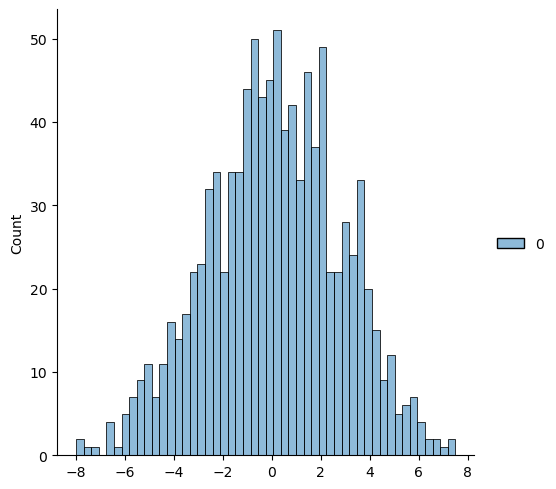

In [25]:
sns.displot(e1, bins=50)